# Machine Learning and Deep Mining Spam Email Detection Project

SOFE 4620U - Machine Learning & Data Mining Final Project

---

### Problem Statement

The problem we wish to address is the filtering of spam emails from one's personal email address. Spam is a common issue for most individuals as various sites leak user’s email information to nefarious companies who then “spam” the users email with repetitive and often inappropriate advertisements. Although solutions for this problem already exist, we wish to build an email filtering system with categorization of spam emails to further our understanding of natural language processing and machine learning as a whole. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import enchant
import itertools

from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rnlclng.pilar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rnlclng.pilar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rnlclng.pilar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv("spam_nospam.csv", header=None)
df[:]

,0,1,2
0,CATEGORY,MESSAGE,FILE_NAME
1,1,"Dear Homeowner,\r\n\r\n \r\n\r\nInterest Rates...",00249.5f45607c1bffe89f60ba1ec9f878039a
2,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
3,1,This is a multi-part message in MIME format.\r...,00214.1367039e50dc6b7adb0f2aa8aba83216
4,1,IMPORTANT INFORMATION:\r\n\r\n\r\n\r\nThe new ...,00210.050ffd105bd4e006771ee63cabc59978
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5793,0,Damien Morton quoted:\r\n\r\n>W3C approves HTM...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\r\n\r\...",01127.841233b48eceb74a825417d8d918abf8
5795,0,"Once upon a time, Manfred wrote :\r\n\r\n\r\n\...",01178.5c977dff972cd6eef64d4173b90307f0


## Dataset information and statistics
---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5797 non-null   object
 1   1       5797 non-null   object
 2   2       5797 non-null   object
dtypes: object(3)
memory usage: 136.0+ KB


In [4]:
df.describe()

,0,1,2
count,5797,5797,5797
unique,3,5626,5797
top,0,\r\n\r\nHello I am your hot lil horny toy.\r\n...,FILE_NAME
freq,3900,7,1


In [5]:
df.shape

(5797, 3)

In [6]:
df.dtypes

0    object
1    object
2    object
dtype: object

In [7]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [8]:
df = df.rename(columns={0:"Type", 1:"Message", 2:"Filename"})
df = df.drop(columns={"Filename"})
df = df.drop(0)
df[:]

,Type,Message
1,1,"Dear Homeowner,\r\n\r\n \r\n\r\nInterest Rates..."
2,1,ATTENTION: This is a MUST for ALL Computer Use...
3,1,This is a multi-part message in MIME format.\r...
4,1,IMPORTANT INFORMATION:\r\n\r\n\r\n\r\nThe new ...
5,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver..."
5793,0,Damien Morton quoted:\r\n\r\n>W3C approves HTM...
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\r\n\r\..."
5795,0,"Once upon a time, Manfred wrote :\r\n\r\n\r\n\..."


In [9]:
df["Length"] = df["Message"].apply(len)
df[:]

,Type,Message,Length
1,1,"Dear Homeowner,\r\n\r\n \r\n\r\nInterest Rates...",671
2,1,ATTENTION: This is a MUST for ALL Computer Use...,1373
3,1,This is a multi-part message in MIME format.\r...,7032
4,1,IMPORTANT INFORMATION:\r\n\r\n\r\n\r\nThe new ...,1188
5,1,This is the bottom line. If you can GIVE AWAY...,1862
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",1016
5793,0,Damien Morton quoted:\r\n\r\n>W3C approves HTM...,278
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\r\n\r\...",418
5795,0,"Once upon a time, Manfred wrote :\r\n\r\n\r\n\...",1499


<AxesSubplot:xlabel='Type', ylabel='count'>

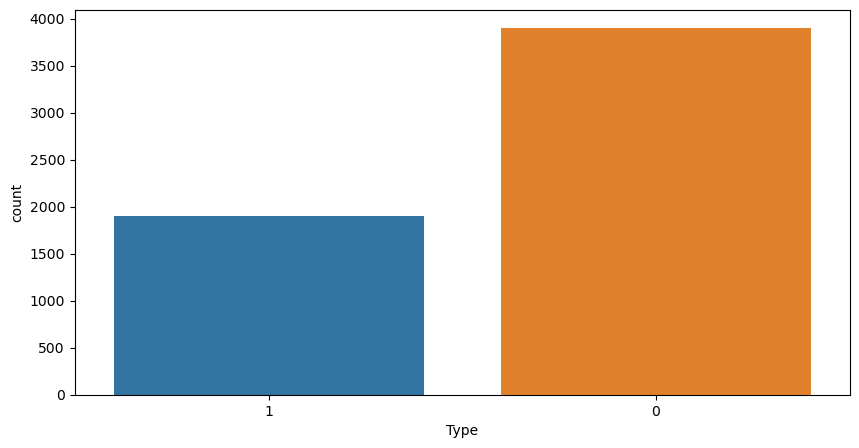

In [10]:
plt.figure(figsize = (10, 5))
x = df.Type.value_counts()
sns.countplot(x = "Type", data = df)

## Cleaning the dataset
---

In [11]:
df[:]

,Type,Message,Length
1,1,"Dear Homeowner,\r\n\r\n \r\n\r\nInterest Rates...",671
2,1,ATTENTION: This is a MUST for ALL Computer Use...,1373
3,1,This is a multi-part message in MIME format.\r...,7032
4,1,IMPORTANT INFORMATION:\r\n\r\n\r\n\r\nThe new ...,1188
5,1,This is the bottom line. If you can GIVE AWAY...,1862
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",1016
5793,0,Damien Morton quoted:\r\n\r\n>W3C approves HTM...,278
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\r\n\r\...",418
5795,0,"Once upon a time, Manfred wrote :\r\n\r\n\r\n\...",1499


In [12]:
html_content_tags = ["html", "body", "head", "footer", "b", "br", "font", "http", "com", "www", "img", "alt", "table", "td", "arial", "helvetica", "sans-serif", "sans serif", "3d", "input", "colspan", "sans", "serif", "div", "text", "align", "type", "p", "margin"]

In [13]:
clean_html = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});|^[0-9a-zA-Z]*=[0-9a-zA-Z\s\D]*"[0-9a-zA-Z\s\D]*"|<[0-9a-zA-Z\s\D]*?>|[0-9]*')

def remove_html_tags(string):
    return clean_html.sub("", string)

# Remove html tags from messages
df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words in remove_html_tags(words)))
counter_soup = 1
for message in df["Message"]:
    soup = BeautifulSoup(message)
    text = soup.get_text()
    df.loc[counter_soup, "Message"] = text
    counter_soup = counter_soup + 1
    
df["Length"] = df["Message"].apply(len)

C:\Users\rnlclng.pilar\AppData\Local\Temp\ipykernel_6164\2499453613.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(message)


In [14]:
# Removing punctuation
df["Message"] = df["Message"].str.replace("\W", " ", regex=True)

# Lower casing all letters
df["Message"] = df["Message"].str.lower()

# Remove blank space
df["Message"] = df["Message"].str.replace(r"\s+", " ", regex=True)
df["Message"] = df["Message"].str.replace(r"^\s+|\s*?$", " ", regex=True)

# Remove content transfer strings
df["Message"] = df["Message"].str.replace("content transfer", " ")

df[:]

,Type,Message,Length
1,1,dear homeowner interest rates are at their low...,467
2,1,attention this is a must for all computer user...,1091
3,1,this is a multi part message in mime format co...,824
4,1,important information the new domain names are...,1037
5,1,this is the bottom line if you can give away c...,1579
...,...,...,...
5792,0,i m one of the but it s not working very well ...,817
5793,0,damien morton quoted approves html emotitags n...,234
5794,0,on mon at che wrote thats the correct lines to...,331
5795,0,once upon a time manfred wrote i would like to...,1179


In [15]:
stop_words_list = set(stopwords.words("english"))
df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words not in stop_words_list))

df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words not in html_content_tags))

counter_message = 1
max_message_amount = len(df["Message"])
d = enchant.Dict("en_US")
for message in df["Message"]:
    message_new = message.split()
    for word in message_new:
        if d.check(word) == False:
            message_new.remove(word)
        
    df.loc[counter_message, "Message"] = ' '.join(message_new)
    message_new.clear()
    counter_message = counter_message + 1
    
    if (counter_message == max_message_amount):
        break

df["Length"] = df["Message"].apply(len)

In [16]:
# Save to csv 
df[:].to_csv('cleaned_data.csv', index=False)
df[:]

,Type,Message,Length
1,1,dear homeowner interest rates lowest point yea...,340
2,1,attention must computer users new special pack...,653
3,1,multi part message mime format content plain e...,505
4,1,important information new domain names finally...,666
5,1,bottom line give away cd free people like one ...,903
...,...,...,...
5792,0,one working well week updates servers syncing ...,387
5793,0,morton quoted approves able say feeling times ...,96
5794,0,mon wrote correct lines added sources list rep...,184
5795,0,upon time wrote would like install rpm tried g...,672


## Most Common Words
---

In [17]:
#non_spam = df[df.Type == 0]
#spam = df[df.Type == 1]

#non_spam_text = " ".join(non_spam.Message.to_numpy().tolist())
#spam_text = " ".join(spam.Message.to_numpy().tolist())

non_spam_amount = []
spam_amount = []
counter = 0

# Add spam and non-spam messages to their own array list

for i in df["Type"]:
    if (i == "0"):
        non_spam_amount.append(df["Message"].iloc[counter])
    elif (i == "1"):
        spam_amount.append(df["Message"].iloc[counter])
    counter = counter + 1

### Non-Spam Words
---

In [18]:
nonspam_word = []
for words in non_spam_amount:
    word = word_tokenize(words)
    for w in word:
        nonspam_word.append(w)
        
nonspam_word = nltk.FreqDist(nonspam_word)

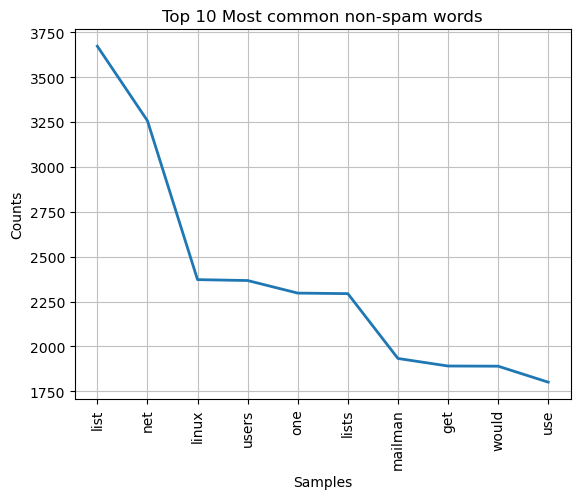

<AxesSubplot:title={'center':'Top 10 Most common non-spam words'}, xlabel='Samples', ylabel='Counts'>

In [19]:
nonspam_word.plot(10, title="Top 10 Most common non-spam words")

In [20]:
# Split each non-spam message into individual words and add them to an array list

for i in non_spam_amount:
    split_words_nonspam = i.split()

In [21]:
# Utilize counter function to determine most common non-spam words
word_set_nonspam = Counter(split_words_nonspam)
frequent_words_nonspam = word_set_nonspam.most_common(15)
print(frequent_words_nonspam)

[('folder', 5), ('pick', 3), ('display', 3), ('panasas', 3), ('exmh', 3), ('workers', 3), ('new', 2), ('ftoc', 2), ('rescan', 2), ('welch', 2), ('redhat', 2), ('run', 1), ('use', 1), ('button', 1), ('show', 1)]


In [22]:
# Display most occurring non-spam words
nonspam_amount = pd.DataFrame(frequent_words_nonspam)
nonspam_amount = nonspam_amount.rename(columns={0:"Words", 1:"Occurrences"})
nonspam_amount

,Words,Occurrences
0,folder,5
1,pick,3
2,display,3
3,panasas,3
4,exmh,3
5,workers,3
6,new,2
7,ftoc,2
8,rescan,2
9,welch,2


### Spam Words
---

In [23]:
spam_word = []
for words in spam_amount:
    word_spam = word_tokenize(words)
    for w in word_spam:
        spam_word.append(w)
        
spam_word = nltk.FreqDist(spam_word)

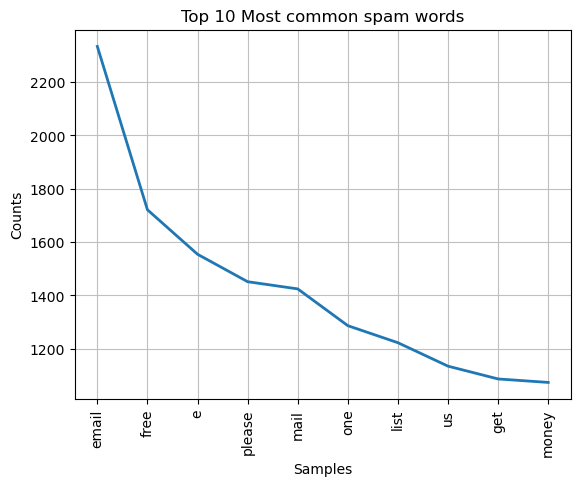

<AxesSubplot:title={'center':'Top 10 Most common spam words'}, xlabel='Samples', ylabel='Counts'>

In [24]:
spam_word.plot(10, title="Top 10 Most common spam words")

In [25]:
# Split each spam message into individual words and add them to an array list
for i in spam_amount:
    split_words_spam = i.split()

In [26]:
# Utilize counter function to determine most common spam words
word_set_spam = Counter(split_words_spam)
frequent_words_spam = word_set_spam.most_common(15)
print(frequent_words_spam)

[('recent', 1), ('survey', 1), ('conducted', 1), ('enter', 1), ('cc', 1), ('come', 1), ('virility', 1), ('affiliate', 1)]


In [27]:
# Display most occurring spam words
spam_amount = pd.DataFrame(frequent_words_spam)
spam_amount = spam_amount.rename(columns={0:"Words", 1:"Occurrences"})
spam_amount

,Words,Occurrences
0,recent,1
1,survey,1
2,conducted,1
3,enter,1
4,cc,1
5,come,1
6,virility,1
7,affiliate,1


## Most common words with wordcloud
---

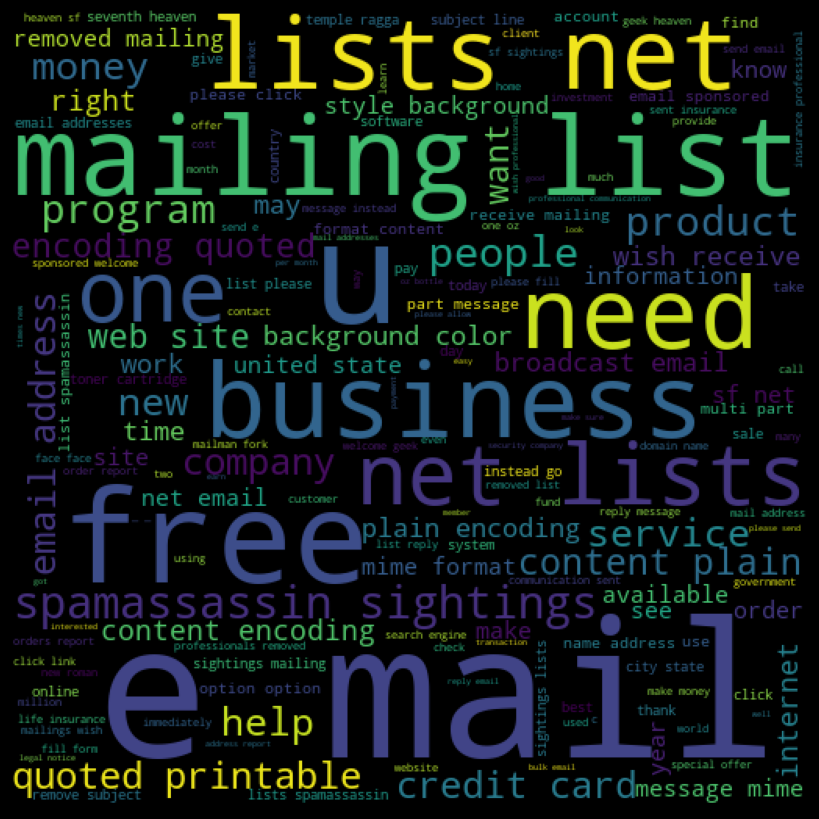

In [28]:
spam_words = " ".join(list(df[df["Type"] == "1"]["Message"]))
spam_wordcloud = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

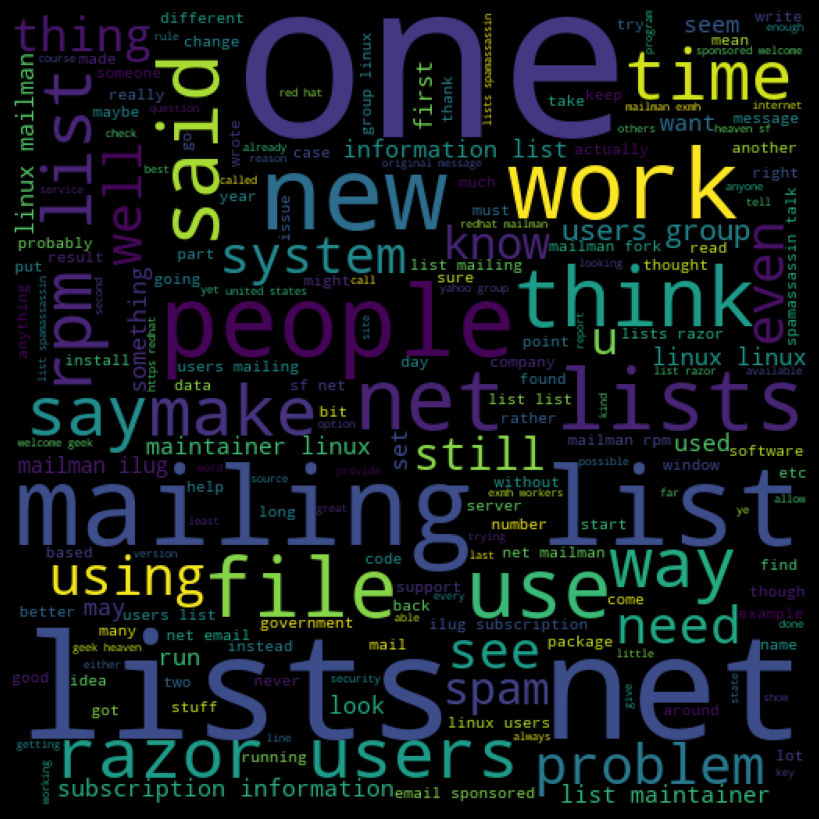

In [29]:
non_spam_words = " ".join(list(df[df["Type"] == "0"]["Message"]))
non_spam_wordcloud = WordCloud(width = 512, height = 512).generate(non_spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(non_spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Extracting Topics using Latent Dirichlet Allocation (LDA)
---
https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925

In [30]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [31]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data[:]

,Type,Message,Length
0,1,dear homeowner interest rates lowest point yea...,340
1,1,attention must computer users new special pack...,653
2,1,multi part message mime format content plain e...,505
3,1,important information new domain names finally...,666
4,1,bottom line give away cd free people like one ...,903
...,...,...,...
5791,0,one working well week updates servers syncing ...,387
5792,0,morton quoted approves able say feeling times ...,96
5793,0,mon wrote correct lines added sources list rep...,184
5794,0,upon time wrote would like install rpm tried g...,672


### Further preprocessing the message

- Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 3 characters are removed.
- All stopwords are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.

In [32]:
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

cleaned_data["Message"] = cleaned_data["Message"].astype(str)
cleaned_data["Message"] = cleaned_data["Message"].apply(preprocess)
cleaned_data["Length"] = cleaned_data["Message"].apply(len)

cleaned_data[:]

,Type,Message,Length
0,1,"[dear, homeown, rat, lowest, point, year, help...",42
1,1,"[attent, user, special, packag, deal, systemwo...",73
2,1,"[multi, messag, mime, format, content, plain, ...",56
3,1,"[import, inform, domain, name, final, avail, g...",75
4,1,"[line, away, free, peopl, like, month, talk, a...",106
...,...,...,...
5791,0,"[work, week, updat, server, sync, origin, mess...",47
5792,0,"[morton, quot, approv, abl, feel, time, defini...",11
5793,0,"[write, correct, line, add, sourc, list, repos...",20
5794,0,"[time, write, like, instal, tri, inform, visit...",70


### Converting text to Bag of Words

In [33]:
dictionary = gensim.corpora.Dictionary(cleaned_data["Message"])
# dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)


In [34]:
spam_msg = cleaned_data[cleaned_data["Type"]==1]
messages = spam_msg["Message"]

bow_corpus = [dictionary.doc2bow(doc) for doc in messages]

### Running LDA Model

In [35]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10)
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.013*"money" + 0.012*"account" + 0.011*"fund" + 0.011*"compani" + 0.011*"transact" + 0.009*"busi" + 0.008*"secur" + 0.008*"bank" + 0.008*"countri" + 0.008*"style"


Topic: 1 
Words: 0.014*"life" + 0.014*"mail" + 0.013*"insur" + 0.009*"polici" + 0.009*"profession" + 0.008*"messag" + 0.008*"year" + 0.008*"receiv" + 0.007*"compani" + 0.006*"avail"


Topic: 2 
Words: 0.024*"free" + 0.012*"site" + 0.010*"remov" + 0.010*"search" + 0.010*"sit" + 0.010*"receiv" + 0.009*"time" + 0.007*"offer" + 0.007*"membership" + 0.007*"click"


Topic: 3 
Words: 0.027*"report" + 0.027*"mail" + 0.025*"order" + 0.020*"send" + 0.014*"peopl" + 0.013*"work" + 0.013*"receiv" + 0.013*"program" + 0.012*"money" + 0.011*"address"


Topic: 4 
Words: 0.011*"island" + 0.010*"templ" + 0.009*"offer" + 0.009*"tablet" + 0.008*"state" + 0.008*"kingdom" + 0.008*"botan" + 0.008*"atol" + 0.007*"smoke" + 0.007*"ragga"


Topic: 5 
Words: 0.050*"list" + 0.029*"sight" + 0.023*"content" + 0.019*"spamassassin" + 0.015

## Training and Testing Different Models 
---

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data[:]

,Type,Message,Length
0,1,dear homeowner interest rates lowest point yea...,340
1,1,attention must computer users new special pack...,653
2,1,multi part message mime format content plain e...,505
3,1,important information new domain names finally...,666
4,1,bottom line give away cd free people like one ...,903
...,...,...,...
5791,0,one working well week updates servers syncing ...,387
5792,0,morton quoted approves able say feeling times ...,96
5793,0,mon wrote correct lines added sources list rep...,184
5794,0,upon time wrote would like install rpm tried g...,672


In [38]:
X = cleaned_data['Message'].fillna(' ')  # message column
y = cleaned_data['Type'].fillna(' ')  # type column (spam/ham)

# split the data into training and testing sets with a 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# check the shapes of the resulting vectors
print("X_train shape:", X_train_vectorized.shape)
print("X_test shape:", X_test_vectorized.shape)

X_train shape: (4636, 27048)
X_test shape: (1160, 27048)


Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = nb.predict(X_test_vectorized)

# Evaluate Performance
bayes_accuracy = accuracy_score(y_test, y_pred)
bayes_precision = precision_score(y_test, y_pred)
bayes_recall = recall_score(y_test, y_pred)
bayes_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", bayes_accuracy)
print("Precision:", bayes_precision)
print("Recall:", bayes_recall)
print("F1:", bayes_f1)

Accuracy: 0.9629310344827586
Precision: 0.9889807162534435
Recall: 0.9020100502512562
F1: 0.9434954007884363


Support Vector Machines | SVM

In [40]:
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = svm.predict(X_test_vectorized)

# Evaluate Performance
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1:", svm_f1)


Accuracy: 0.9827586206896551
Precision: 0.9871134020618557
Recall: 0.9623115577889447
F1: 0.974554707379135


Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = rf.predict(X_test_vectorized)

# Evaluate Performance
forest_accuracy = accuracy_score(y_test, y_pred)
forest_precision = precision_score(y_test, y_pred)
forest_recall = recall_score(y_test, y_pred)
forest_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", forest_accuracy)
print("Precision:", forest_precision)
print("Recall:", forest_recall)
print("F1:", forest_f1)

Accuracy: 0.9818965517241379
Precision: 0.967741935483871
Recall: 0.9798994974874372
F1: 0.9737827715355807


K-Nearest Neighbors | KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=250)
knn.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = knn.predict(X_test_vectorized)

# Evaluate Performance
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1:", knn_f1)

Accuracy: 0.9422413793103448
Precision: 0.9106699751861043
Recall: 0.9221105527638191
F1: 0.9163545568039951


Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = lr.predict(X_test_vectorized)

# Evaluate Performance
regression_accuracy = accuracy_score(y_test, y_pred)
regression_precision = precision_score(y_test, y_pred)
regression_recall = recall_score(y_test, y_pred)
regression_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", regression_accuracy)
print("Precision:", regression_precision)
print("Recall:", regression_recall)
print("F1:", regression_f1)

Accuracy: 0.9741379310344828
Precision: 0.9919786096256684
Recall: 0.9321608040201005
F1: 0.961139896373057


<AxesSubplot:>

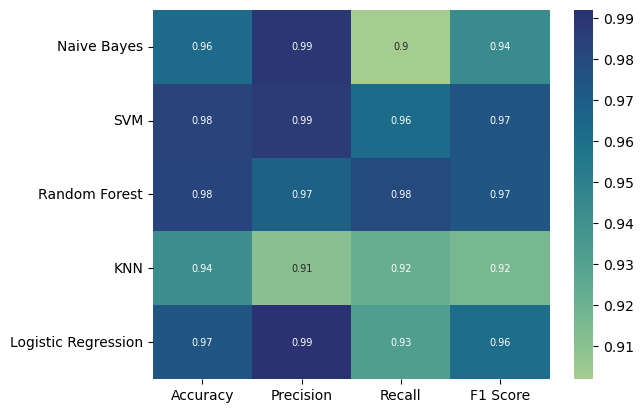

In [44]:
data_results = [[bayes_accuracy, bayes_precision, bayes_recall, bayes_f1], 
                [svm_accuracy, svm_precision, svm_recall, svm_f1], 
                [forest_accuracy, forest_precision, forest_recall, forest_f1], 
                [knn_accuracy, knn_precision, knn_recall, knn_f1], 
                [regression_accuracy, regression_precision, regression_recall, regression_f1]]
df_heatmap = pd.DataFrame(data_results, columns=["Accuracy", "Precision", "Recall", "F1 Score"])
sns.heatmap(df_heatmap, annot=True, annot_kws={"size": 7}, yticklabels=["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"], cmap="crest")

In [45]:
accuracy_results = [bayes_accuracy, svm_accuracy, forest_accuracy, knn_accuracy, regression_accuracy]
precision_results = [bayes_precision, svm_precision, forest_precision, knn_precision, regression_precision]
recall_results = [bayes_recall, svm_recall, forest_recall, knn_recall, regression_recall]
f1_results = [bayes_f1, svm_f1, forest_f1, knn_f1, regression_f1]

In [46]:
bayes = [bayes_accuracy, bayes_precision, bayes_recall, bayes_f1]
svm = [svm_accuracy, svm_precision, svm_recall, svm_f1]
forest = [forest_accuracy, forest_precision, forest_recall, forest_f1]
knn = [knn_accuracy, knn_precision, knn_recall, knn_f1]
regression = [regression_accuracy, regression_precision, regression_recall, regression_f1]

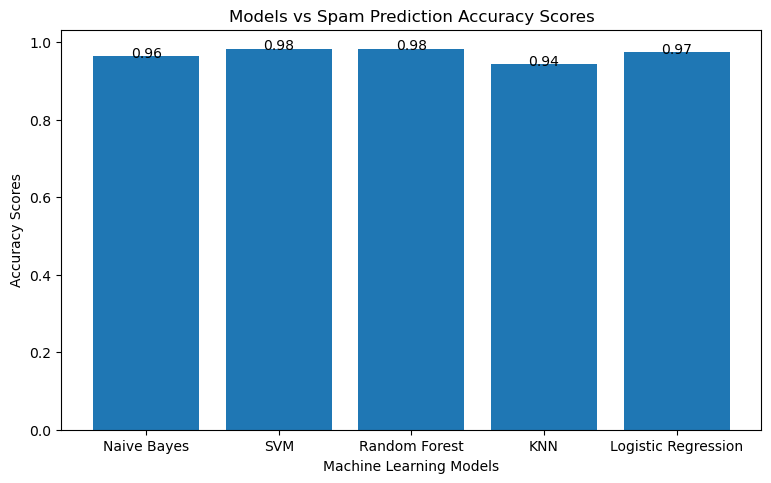

In [47]:
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
algorithm_accuracy = plt.figure(figsize=(7, 4))
algorithm_axes = algorithm_accuracy.add_axes([0, 0, 1, 1])
algorithm_axes.bar(np.arange(len(accuracy_results)), accuracy_results)
plt.title("Models vs Spam Prediction Accuracy Scores")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Scores")
plt.xticks(np.arange(len(algorithm_models)), algorithm_models)
plt.text(0, round(bayes_accuracy, 2), round(bayes_accuracy, 2), ha = 'center')
plt.text(1, round(svm_accuracy, 2), round(svm_accuracy, 2), ha = 'center')
plt.text(2, round(forest_accuracy, 2), round(forest_accuracy, 2), ha = 'center')
plt.text(3, round(knn_accuracy, 2), round(knn_accuracy, 2), ha = 'center')
plt.text(4, round(regression_accuracy, 2), round(regression_accuracy, 2), ha = 'center')
plt.show()

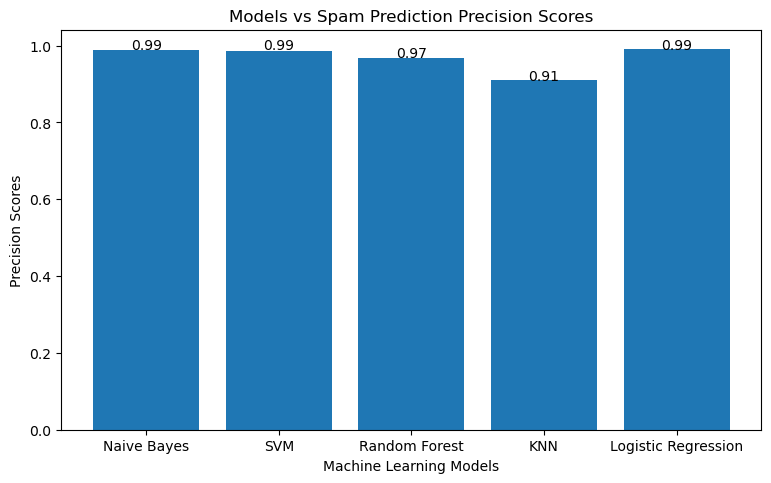

In [48]:
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
algorithm_precision = plt.figure(figsize=(7, 4))
algorithm_axes = algorithm_precision.add_axes([0, 0, 1, 1])
algorithm_axes.bar(np.arange(len(precision_results)), precision_results)
plt.title("Models vs Spam Prediction Precision Scores")
plt.xlabel("Machine Learning Models")
plt.ylabel("Precision Scores")
plt.xticks(np.arange(len(algorithm_models)), algorithm_models)
plt.text(0, round(bayes_precision, 2), round(bayes_precision, 2), ha = 'center')
plt.text(1, round(svm_precision, 2), round(svm_precision, 2), ha = 'center')
plt.text(2, round(forest_precision, 2), round(forest_precision, 2), ha = 'center')
plt.text(3, round(knn_precision, 2), round(knn_precision, 2), ha = 'center')
plt.text(4, round(regression_precision, 2), round(regression_precision, 2), ha = 'center')
plt.show()

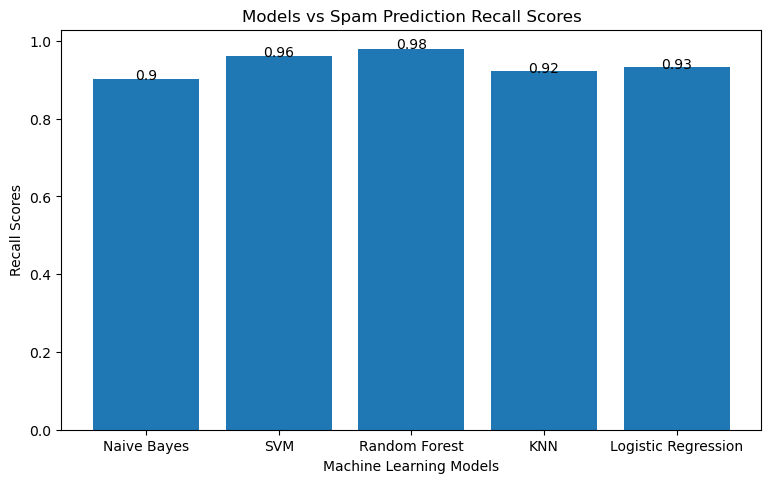

In [49]:
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
algorithm_recall = plt.figure(figsize=(7, 4))
algorithm_axes = algorithm_recall.add_axes([0, 0, 1, 1])
algorithm_axes.bar(np.arange(len(recall_results)), recall_results)
plt.title("Models vs Spam Prediction Recall Scores")
plt.xlabel("Machine Learning Models")
plt.ylabel("Recall Scores")
plt.xticks(np.arange(len(algorithm_models)), algorithm_models)
plt.text(0, round(bayes_recall, 2), round(bayes_recall, 2), ha = 'center')
plt.text(1, round(svm_recall, 2), round(svm_recall, 2), ha = 'center')
plt.text(2, round(forest_recall, 2), round(forest_recall, 2), ha = 'center')
plt.text(3, round(knn_recall, 2), round(knn_recall, 2), ha = 'center')
plt.text(4, round(regression_recall, 2), round(regression_recall, 2), ha = 'center')
plt.show()

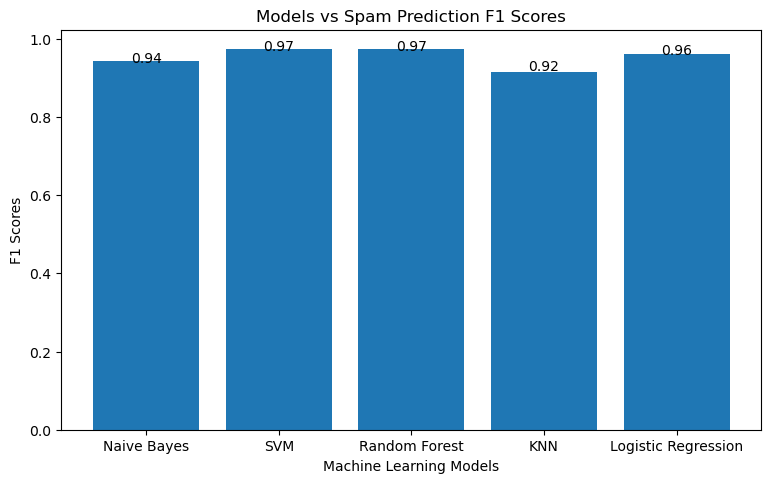

In [50]:
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
algorithm_f1 = plt.figure(figsize=(7, 4))
algorithm_axes = algorithm_f1.add_axes([0, 0, 1, 1])
algorithm_axes.bar(np.arange(len(f1_results)), f1_results)
plt.title("Models vs Spam Prediction F1 Scores")
plt.xlabel("Machine Learning Models")
plt.ylabel("F1 Scores")
plt.xticks(np.arange(len(algorithm_models)), algorithm_models)
plt.text(0, round(bayes_f1, 2), round(bayes_f1, 2), ha = 'center')
plt.text(1, round(svm_f1, 2), round(svm_f1, 2), ha = 'center')
plt.text(2, round(forest_f1, 2), round(forest_f1, 2), ha = 'center')
plt.text(3, round(knn_f1, 2), round(knn_f1, 2), ha = 'center')
plt.text(4, round(regression_f1, 2), round(regression_f1, 2), ha = 'center')
plt.show()

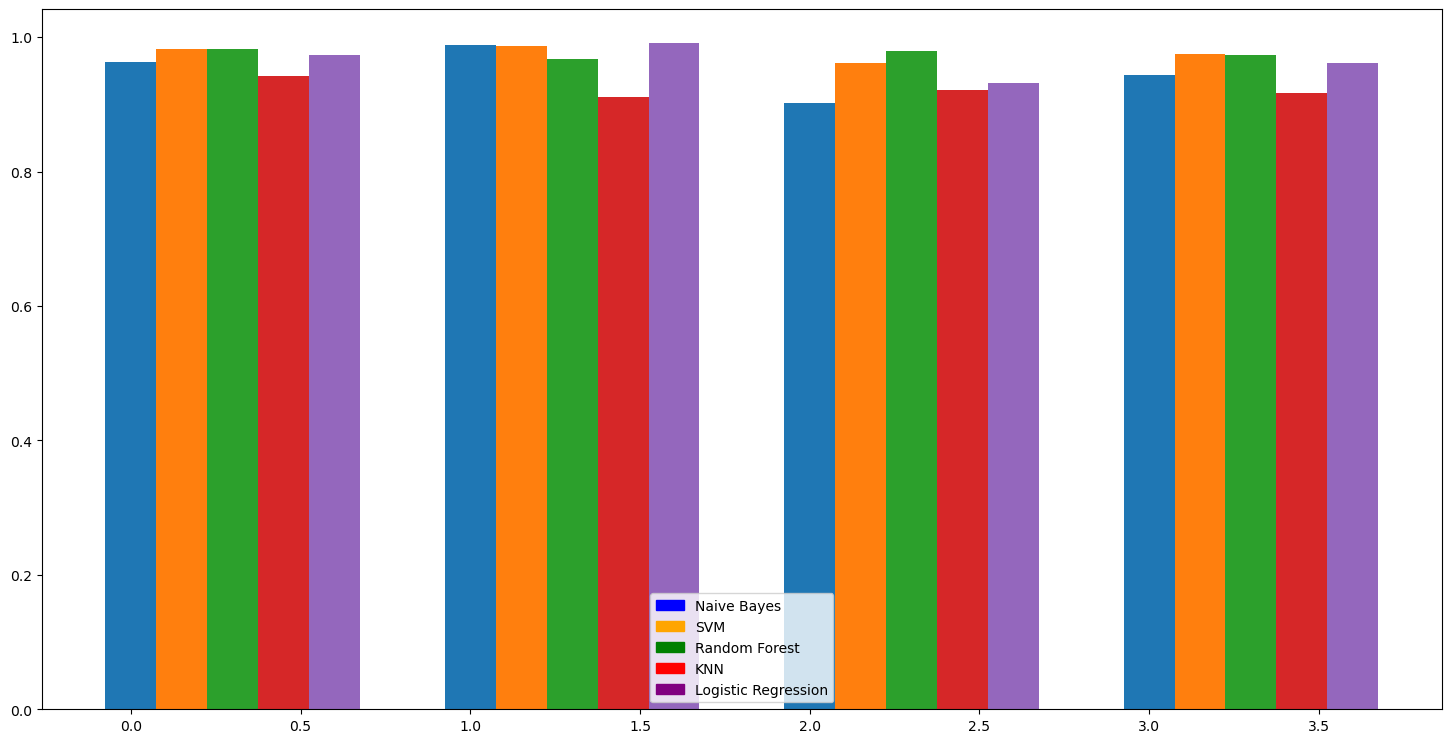

In [51]:
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
colors = {"Naive Bayes":"blue", "SVM":"orange", "Random Forest":"green", "KNN":"red", "Logistic Regression":"purple"}
algorithm_types = plt.figure(figsize=(7, 7))
algorithm_axes = algorithm_types.add_axes([0, 0, 2, 1])
width = 0.15
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colors[label]) for label in labels]
algorithm_axes.bar(np.arange(len(bayes)), bayes, width = width)
algorithm_axes.bar(np.arange(len(svm)) + width, svm, width = width)
algorithm_axes.bar(np.arange(len(forest)) + width + width, forest, width = width)
algorithm_axes.bar(np.arange(len(knn)) + width + width + width, knn, width = width)
algorithm_axes.bar(np.arange(len(regression)) + width + width + width + width, regression, width = width)
#plt.text(0, round(bayes[0], 2), round(bayes[0], 2), ha = 'center')
#plt.text(0.15, round(svm[0], 2), round(svm[0], 2), ha = 'center')
plt.legend(handles, labels)
plt.show()